In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv("adult 3.csv")

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:

print("Shape:", df.shape)

print(df.info())

print(df.describe())


Shape: (48842, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
                age        fnlwgt  educational-num  

In [ ]:
df = df.replace(' ?', np.nan)

In [ ]:
print(df.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
df = df.replace({'?': np.nan, ' ?': np.nan})


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:

print(df['workclass'].unique())


['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [ ]:
# Apply strip() to all object (string) columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipython-input-12-1554810335.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
print(df['workclass'].unique())


['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df['income'].value_counts()


,count
income,
<=50K,37155
>50K,11687


In [ ]:
df['income'].value_counts()


,count
income,
<=50K,37155
>50K,11687


In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


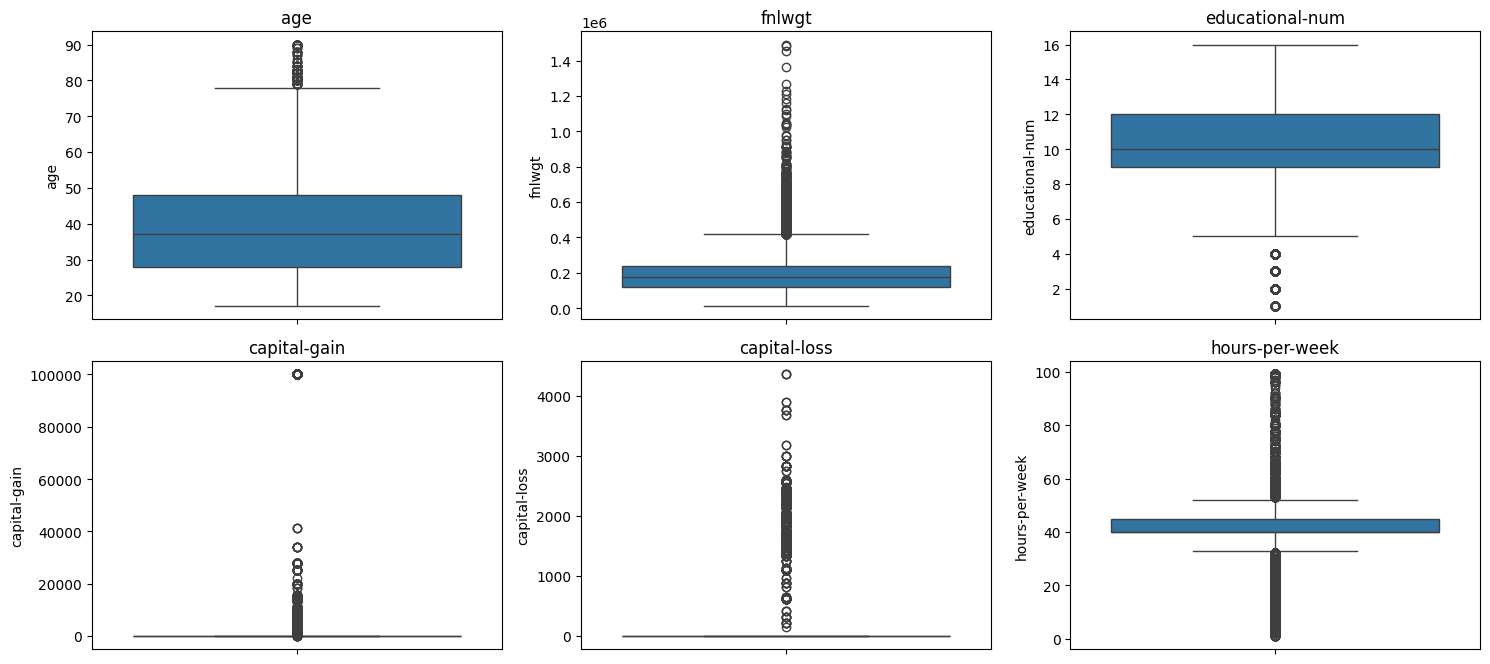

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower) & (df[column] <= upper)]
    return df

df = remove_outliers_iqr(df, 'age')



df = df.reset_index(drop=True)


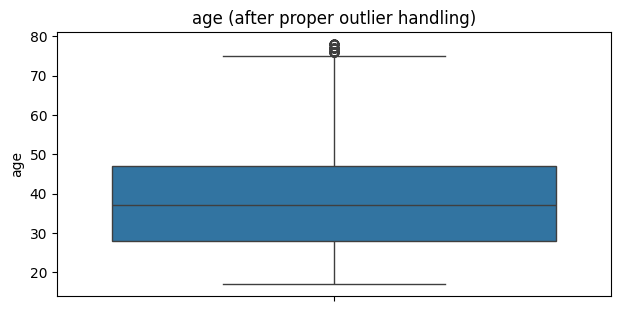

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
cols = ['age']
for i, col in enumerate(cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"{col} (after proper outlier handling)")
plt.tight_layout()
plt.show()


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


In [ ]:
df.drop('native-country', axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                    'relationship', 'race', 'gender', 'native-country']

label_encoders = {}

for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        le.fit(df[col])
        label_encoders[col] = le
        df[col] = le.transform(df[col])


# Encode target column: income
le_income = LabelEncoder()
le_income.fit(df['income'])                # Optional: save if needed
df['income'] = le_income.transform(df['income']).astype(int)


In [ ]:

numerical_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Then save
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(numerical_cols, 'scaled_columns.pkl')


['scaled_columns.pkl']

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,-1.002898,3,0.350066,1,-1.201540,4,6,3,2,1,-0.144495,-0.21723,-0.038739,0
1,-0.033095,3,-0.946482,11,-0.421808,2,4,0,4,1,-0.144495,-0.21723,0.771708,0
2,-0.779097,1,1.392592,7,0.747789,2,10,0,4,1,-0.144495,-0.21723,-0.038739,1
3,0.414506,3,-0.279136,15,-0.031942,2,6,0,2,1,0.887405,-0.21723,-0.038739,1
4,-1.525099,8,-0.816977,15,-0.031942,4,14,3,4,0,-0.144495,-0.21723,-0.849186,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('income', axis=1)
y = df['income']

# Perform train-test split (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Save the list of columns used during training
import joblib
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')

# Ensure income is encoded and has correct dtype
df['income'] = df['income'].astype(int)


In [ ]:
print("y_train sample:", y_train.head())
print("y_train dtype:", y_train.dtype)
print("y_train unique:", y_train.unique())


y_train sample: 7978     1
13987    0
12238    1
46099    0
34890    0
Name: income, dtype: int64
y_train dtype: int64
y_train unique: [1 0]


Model training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:31:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression: 0.8235
Decision Tree: 0.8148
Random Forest: 0.8582
XGBoost: 0.8713
SVM: 0.8433
KNN: 0.8307


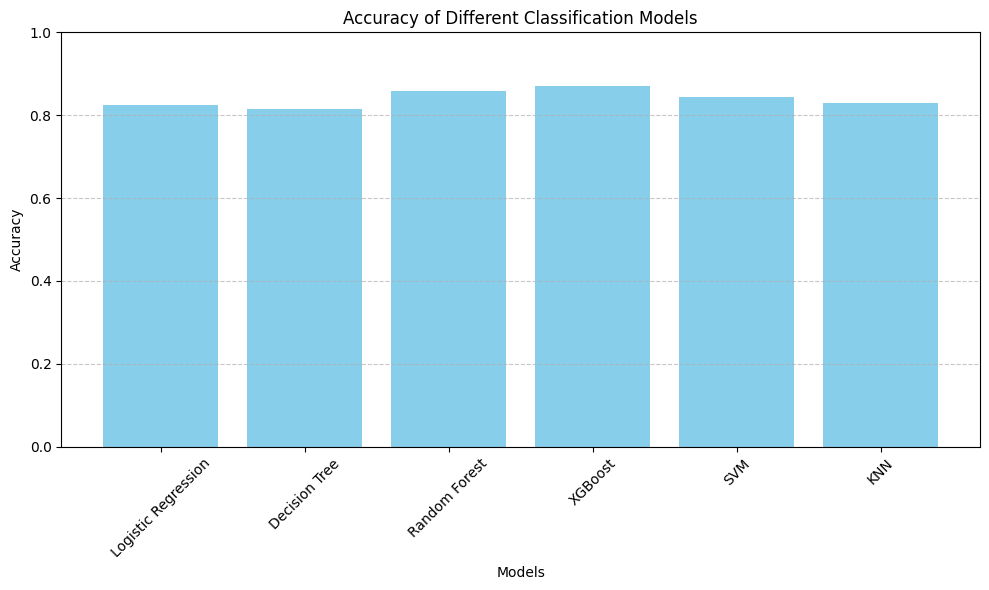

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


accuracies = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

# Print accuracy of each model
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classification Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


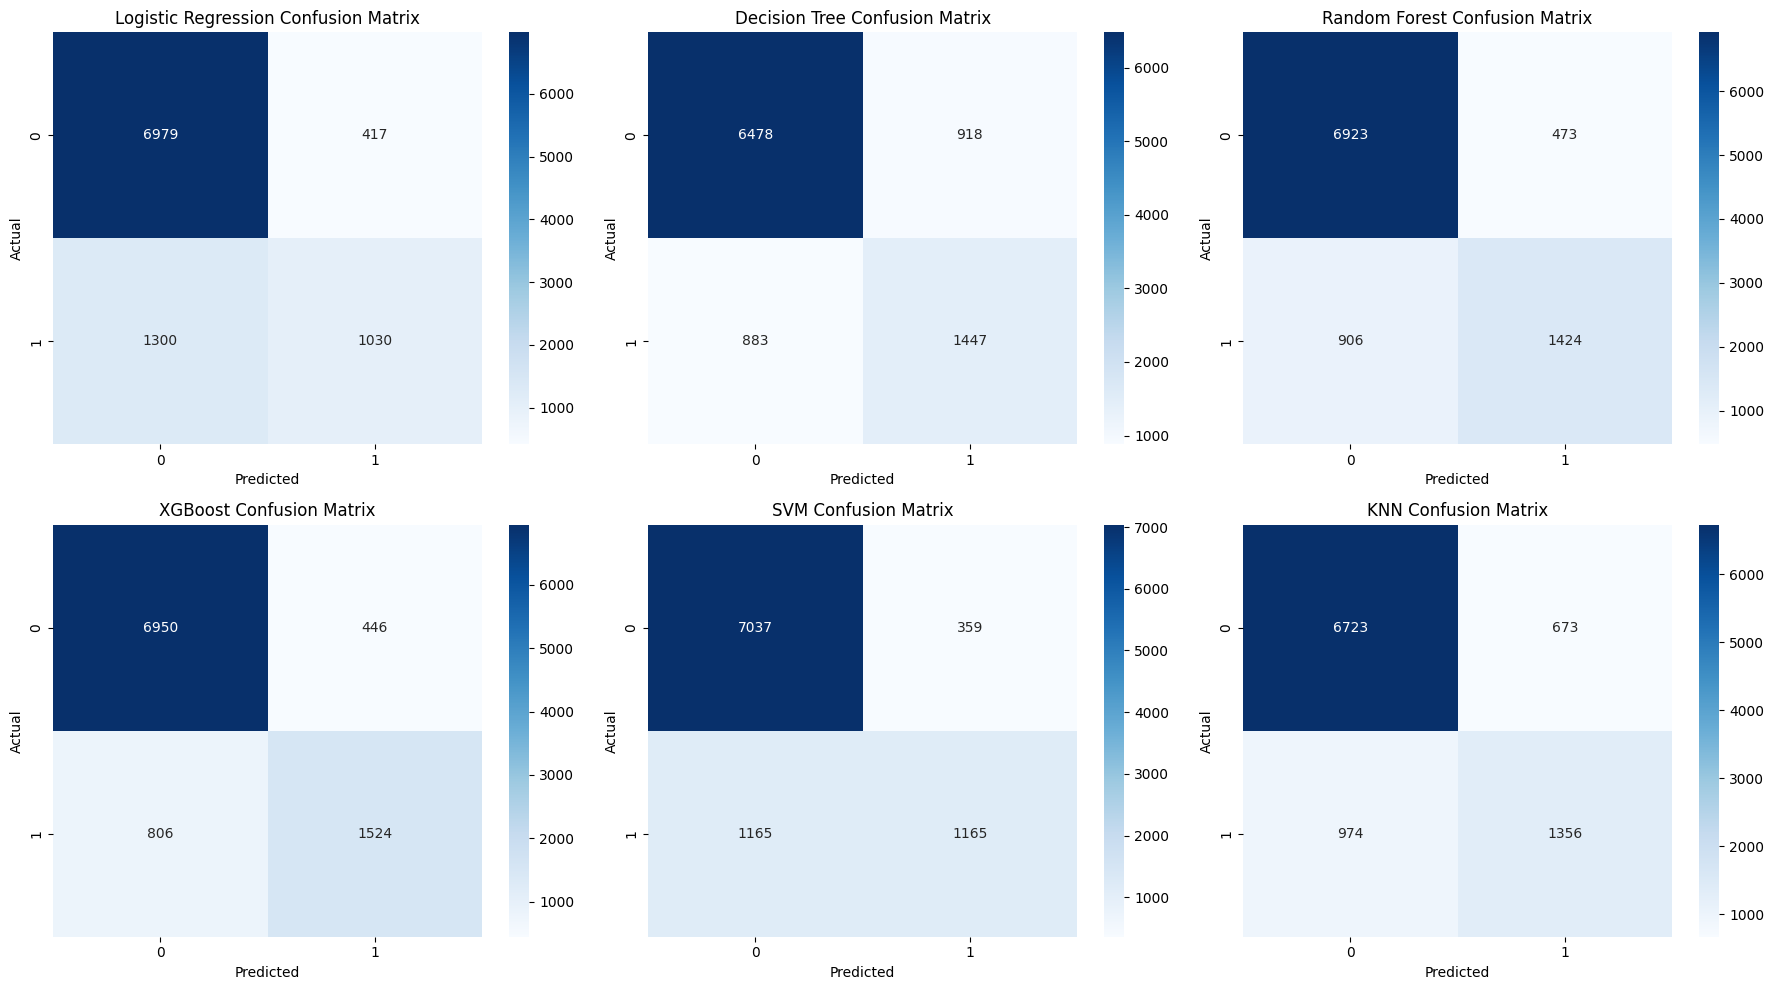

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set up plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Plot confusion matrix for each model
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Print classification report for each model
for name, model in models.items():
    print(f"===== {name} =====")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))


===== Logistic Regression =====
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7396
        >50K       0.71      0.44      0.55      2330

    accuracy                           0.82      9726
   macro avg       0.78      0.69      0.72      9726
weighted avg       0.81      0.82      0.81      9726

===== Decision Tree =====
              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      7396
        >50K       0.61      0.62      0.62      2330

    accuracy                           0.81      9726
   macro avg       0.75      0.75      0.75      9726
weighted avg       0.82      0.81      0.82      9726

===== Random Forest =====
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7396
        >50K       0.75      0.61      0.67      2330

    accuracy                           0.86      9726
   macro avg       0.82      0.77      0.79 

In [ ]:
import joblib

# Save the model
joblib.dump(models['XGBoost'], 'xgboost_model.pkl')

joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']